# Relatório Final - Abel Cavalcante
---
Este relatório apresenta o resultado de três projetos, todos calculando o alinhamento de duas sequências de DNA distintas:  
- A primeira usa uma Busca Exaustiva;
- A segunda usa um método de paralelização da mesma Busca Exaustiva usando a biblioteca OpenMP;
- E, por fim, a Busca Exaustiva é calculada dentro de uma GPU.
---

### Preparações
 
Em todos os testes, as mesmas entradas foram utilizadas e todas foram geradas pelo notebook *SequenceGenerator.ipynb*. Este arquivo gera 7 pastas de entradas, e em cada pasta há 5 arquivos com diferentes sequências de DNA. Cada pasta é separada de acordo com o tamanho das sequências: a sequência 1 possui tamanho fixo de 50, já a sequência 2 muda de acordo com a pasta.
 
A primeira pasta *entradas_1* possui a sequência 2 de tamanho 10, e em cada pasta subsequente o tamanho do sequência 2 aumenta, sendo sempre multiplicado por 10: a pasta *entradas_2* possui a sequência com tamanho 100, a *entrada_3* possui tamanho 1000, e assim por diante.

---
### Busca Exaustiva

Na Busca Exaustiva, foram utilizados os arquivos criados na etapa de preparação:



In [11]:
import subprocess, os
import matplotlib.pyplot as plt

In [12]:
def mean_files(mean, algorithm, files):
    for i in range(files):
        times = []
        for filename in os.listdir(f'Entradas/entradas_{i+1}'):
            with open(f'Entradas/entradas_{i+1}/{filename}', 'r') as file:
                proc = subprocess.run([f'Codigos/{algorithm}'], stdin=file, stdout=subprocess.PIPE)
                out = proc.stdout.decode('utf-8')

                if 'Tempo' in out:
                    times.append(float(out.split('\n')[-2].split(' ')[-2]))

        mean.append(sum(times) / len(times))

Cada tamanho foi testado 5 vezes e foi feita uma média dos tempos obtidos. Assim, foi feito um gráfico juntando o tempo médio para cada tamanho de entrada, em ms:

In [13]:
means_exaust = []
mean_files(means_exaust, 'exaust', 4)
with open('Output/exaust.txt', 'w') as file:
    for i in range(len(means_exaust)):
        file.write(f'{means_exaust[i]}\n')

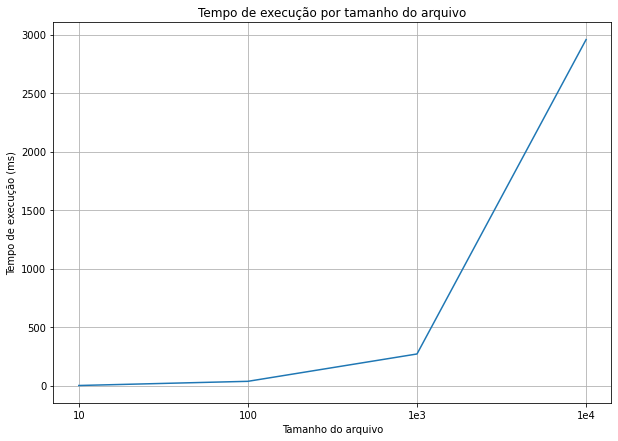

In [14]:
sizes_exaust = ['10', '100', '1e3', '1e4']

plt.figure(figsize = (10, 7))
plt.plot(sizes_exaust, means_exaust)
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.grid(True)
plt.show()

---
### Busca Exaustiva usando OpenMP

No segundo método, a busca exaustiva foi paralelizada usando a biblioteca OpenMP:

In [15]:
means_open = []
mean_files(means_open, 'open', 4)
with open('Output/open.txt', 'w') as file:
    for i in range(len(means_open)):
        file.write(f'{means_open[i]}\n')

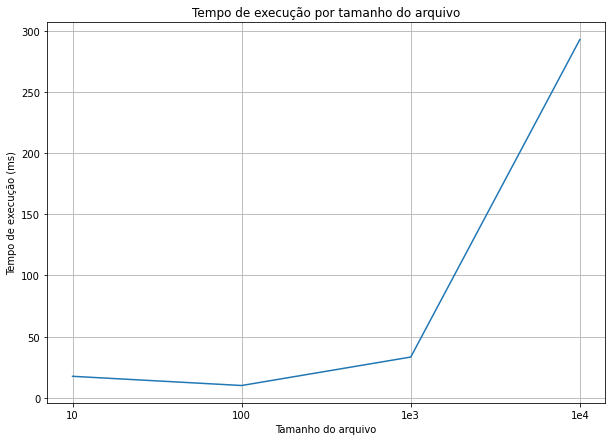

In [16]:
sizes_open = ['10', '100', '1e3', '1e4']

plt.figure(figsize = (10, 7))
plt.plot(sizes_open, means_open)
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.grid(True)
plt.show()

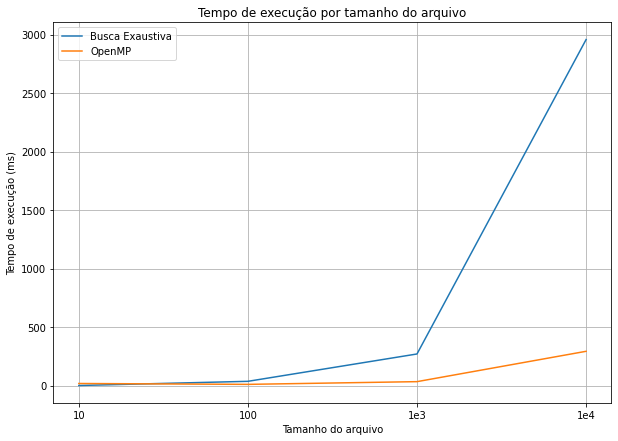

In [17]:
plt.figure(figsize = (10, 7))
plt.plot(sizes_exaust, means_exaust)
plt.plot(sizes_open, means_open)
plt.legend(['Busca Exaustiva', 'OpenMP'])
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.grid(True)
plt.show()

---
### Busca Exaustiva dentro da gpu

Por fim, foi feito uma Busca Exaustiva dentro da GPU:

In [ ]:
means_gpu = []
mean_files(means_gpu, 'gpu', 4)
with open('Output/gpu.txt', 'w') as file:
    for i in range(len(means_gpu)):
        file.write(f'{means_gpu[i]}\n')

In [ ]:
sizes_gpu = ['10', '100', '1e3', '1e4']

plt.figure(figsize = (10, 7))
plt.plot(sizes_gpu, means_gpu)
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.grid(True)
plt.show()

E uma comparação entre os três programas foi feito:

In [ ]:
exaust = []
openp = []
gpu = []

while open('Output/gpu.txt', 'r').readline() != '':
    exaust.append(float(open('Output/exaust.txt', 'r').readline()))
    openp.append(float(open('Output/open.txt', 'r').readline()))
    gpu.append(float(open('Output/gpu.txt', 'r').readline()))

fig, axs = plt.subplots(2, figsize = (13, 10), sharex=True)
fig.suptitle('Tempo de execução por tamanho do arquivo')

plt.rcParams['font.size'] = '14'

axs[0].set_title('Escala Normal')
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

axs[1].set_title('Escala Log')
axs[1].set_yscale('log')

for ax in axs:
    ax.plot(sizes_exaust, means_exaust)
    ax.plot(sizes_open, means_open)
    ax.plot(sizes_gpu, means_gpu)
    ax.legend(['Busca Exaustiva', 'OpenMP', 'GPU'])
    ax.grid(True)

for ax in axs.flat:
    ax.set(xlabel='Tamanho do arquivo', ylabel='Tempo de execução (ms)')

for ax in axs.flat:
    ax.label_outer()

Conclusão